In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Q1 simulate a sine curve between 60 degree and 300 degree wuith some random noise

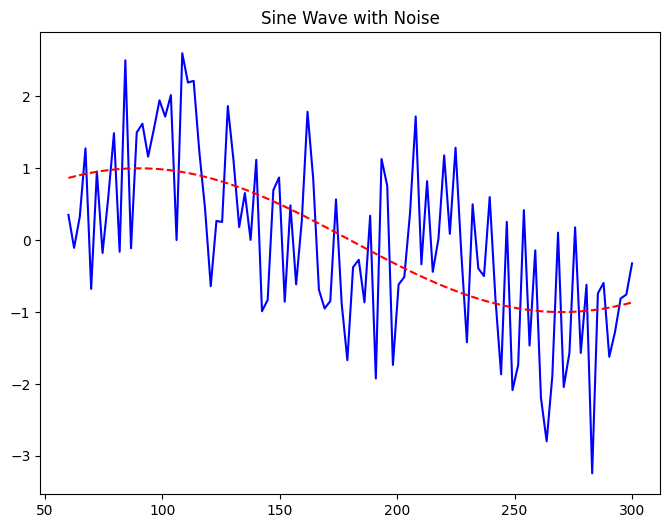

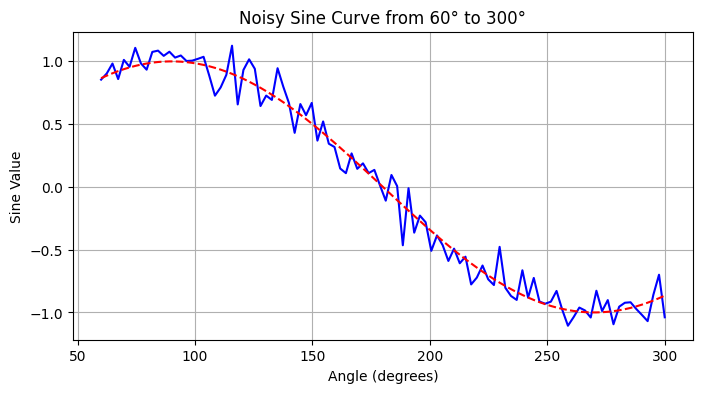

In [ ]:
angles = np.linspace(60,300,100)
rad = np.radians(angles)

noise = np.random.normal(0,1,size=rad.shape)
sine_values=np.sin(rad)+noise

dataset = pd.DataFrame({'Angle':angles,'Sine_Value':sine_values})

dataset.to_csv('sine_data.csv',index=False)

plt.figure(figsize=(8,6))
plt.plot(angles,sine_values,label='Noisy sine wave',linestyle='-',color='b')
plt.plot(angles,np.sin(rad),label='pure sine wave',color='r',linestyle='dashed')
plt.title('Sine Wave with Noise')
angles = np.linspace(60, 300, 100)
radians = np.radians(angles)

noise = np.random.normal(0, 0.1, size=radians.shape)
sine_values = np.sin(radians) + noise

dataset = pd.DataFrame({
    'Angle (degrees)': angles,
    'Sine Value': sine_values
})

dataset.to_csv('noisy_sine_curve.csv', index=False)

plt.figure(figsize=(8, 4))
plt.plot(angles, sine_values, label="Noisy Sine Wave", color="b")
plt.plot(angles, np.sin(radians), label="Pure Sine Wave", color="r", linestyle="dashed")

plt.title("Noisy Sine Curve from 60° to 300°")
plt.xlabel('Angle (degrees)')
plt.ylabel('Sine Value')
plt.grid(True)
plt.show()

# Dataset 2

In [ ]:
df = pd.read_csv('Food_Truck_Data.csv')
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
df.head()

,"Population,Profit"
0,"6.1101,17.592"
1,"5.5277,9.1302"
2,"8.5186,13.662"
3,"7.0032,11.854"
4,"5.8598,6.8233"


In [ ]:
df.shape

(97, 1)

#Cost Function and Gradient Descent

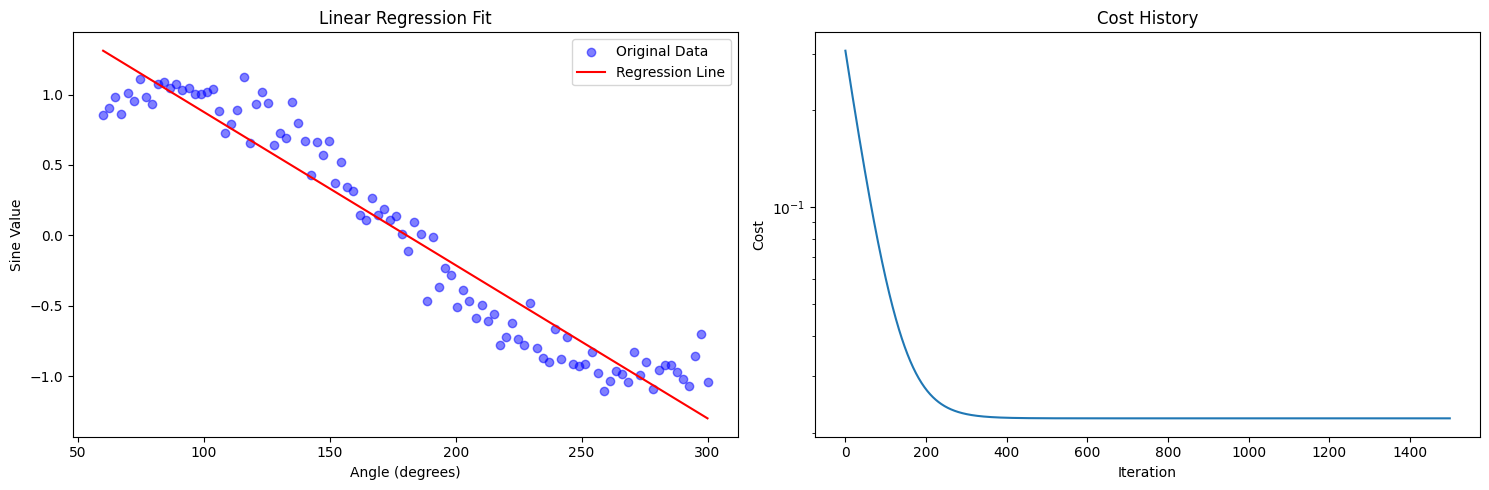

Final cost: 0.022139

Optimized parameters:
theta_0 (intercept): 0.005639
theta_1 (slope): -0.761298

R-squared: 0.929026


In [ ]:
df = pd.read_csv('/content/noisy_sine_curve.csv')
X = df['Angle (degrees)'].values
y = df['Sine Value'].values

X_normalized = (X - np.mean(X)) / np.std(X)
X_normalized = np.column_stack((np.ones(len(X_normalized)), X_normalized))

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1/(2*m)) * np.sum(errors**2)

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for _ in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y

        gradients = (1/m) * X.T.dot(errors)

        theta = theta - alpha * gradients

        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


theta = np.zeros(2)
alpha = 0.01
num_iters = 1500


theta_optimized, cost_history = gradient_descent(X_normalized, y, theta, alpha, num_iters)


y_pred = X_normalized.dot(theta_optimized)

plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Original Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Angle (degrees)')
plt.ylabel('Sine Value')
plt.title('Linear Regression Fit')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.yscale('log')

plt.tight_layout()
plt.show()


print(f"Final cost: {cost_history[-1]:.6f}")
print("\nOptimized parameters:")
print(f"theta_0 (intercept): {theta_optimized[0]:.6f}")
print(f"theta_1 (slope): {theta_optimized[1]:.6f}")


y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR-squared: {r_squared:.6f}")

# 2. Use sklearn to perform linear regression, Lasso and Ridge on Dataset 2, show the scatter plot for best fit line using matplotlib and show the results using MSE

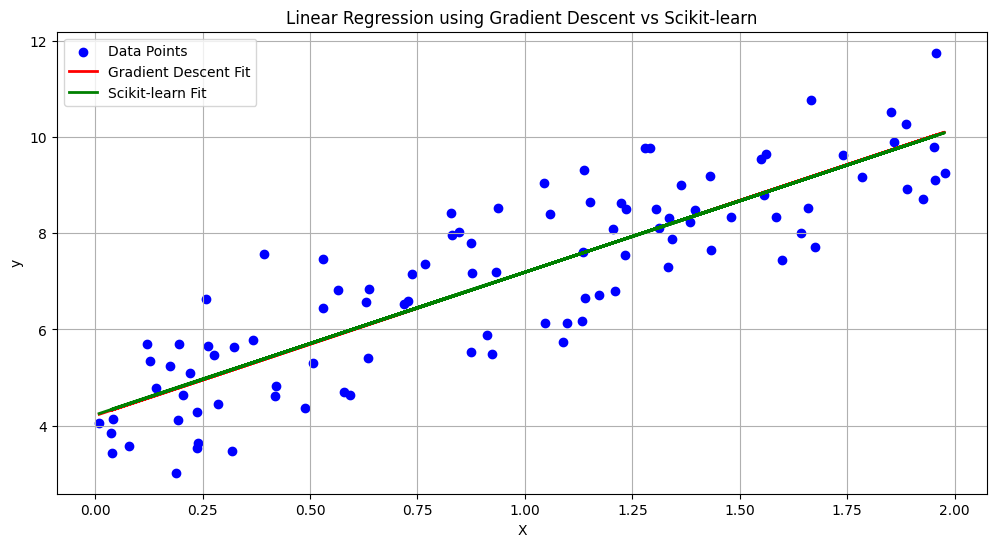

Gradient Descent MSE: 0.9925129761583813
Scikit-learn MSE: 0.9924386487246479
Gradient Descent Parameters (Intercept, Slope): [4.20607718 2.98273036]
Scikit-learn Parameters (Intercept, Slope): (4.222151077447231, 2.968467510701019)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 random points in the range [0, 2]
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

# Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)  # Number of samples
    theta = np.random.randn(2, 1)  # Random initialization of parameters (intercept and slope)

    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (intercept)

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # Compute gradients
        theta -= learning_rate * gradients  # Update parameters

    return theta

# Run gradient descent
theta_gd = gradient_descent(X, y)

# Predictions using gradient descent
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
y_pred_gd = X_b.dot(theta_gd)

# Using scikit-learn's Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_sklearn = lin_reg.predict(X)

# Calculate MSE for both models
mse_gd = mean_squared_error(y, y_pred_gd)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_gd, color='red', label='Gradient Descent Fit', linewidth=2)
plt.plot(X, y_pred_sklearn, color='green', label='Scikit-learn Fit', linewidth=2)
plt.title('Linear Regression using Gradient Descent vs Scikit-learn')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Print the results
print(f"Gradient Descent MSE: {mse_gd}")
print(f"Scikit-learn MSE: {mse_sklearn}")
print(f"Gradient Descent Parameters (Intercept, Slope): {theta_gd.flatten()}")
print(f"Scikit-learn Parameters (Intercept, Slope): {lin_reg.intercept_[0], lin_reg.coef_[0][0]}")

# **House Dataset**

In [ ]:
import pandas as pd
dataset=pd.read_csv('home_data.csv')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
dataset.nunique()

,0
id,21436
date,372
price,4032
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5


In [ ]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
dataset.shape

(21613, 21)

In [ ]:
dataset.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
col_to_be_used=['price','bedrooms','bathrooms','sqft_living','condition','floors','waterfront','view']
dataset1=dataset[col_to_be_used]
dataset1

,price,bedrooms,bathrooms,sqft_living,condition,floors,waterfront,view
0,221900,3,1.00,1180,3,1.0,0,0
1,538000,3,2.25,2570,3,2.0,0,0
2,180000,2,1.00,770,3,1.0,0,0
3,604000,4,3.00,1960,5,1.0,0,0
4,510000,3,2.00,1680,3,1.0,0,0
...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,3,3.0,0,0
21609,400000,4,2.50,2310,3,2.0,0,0
21610,402101,2,0.75,1020,3,2.0,0,0
21611,400000,3,2.50,1600,3,2.0,0,0


In [ ]:
x = dataset1.drop('price',axis=1)
y = dataset1['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x , test_x, train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
reg= LinearRegression().fit(train_x,train_y)

In [ ]:
reg.score(test_x,test_y)

0.5789818453493356

In [ ]:
reg.score(train_x,train_y)

0.5595424526590569

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(train_x,train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(test_x,test_y)

0.578825731206807

In [ ]:
lasso_reg.score(train_x,train_y)

0.5595394213987006